In [95]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

mnist = datasets.load_digits()

In [24]:
X = mnist['data']
y = mnist['target']

In [25]:
# We have 1,797 8x8 images

X.shape, y.shape

((1797, 64), (1797,))

In [26]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# Data Splitting

In [28]:
train_size = 0.8

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_train

array([[ 0.        , -0.32871076, -1.07483877, ...,  1.24176068,
         0.00572469, -0.19090263],
       [ 0.        , -0.32871076,  0.60973472, ..., -1.12393453,
        -0.49284357, -0.19090263],
       [ 0.        , -0.32871076, -0.6536954 , ...,  1.57971714,
         1.99999772, -0.19090263],
       ...,
       [ 0.        ,  0.78271832,  1.66259315, ..., -1.12393453,
        -0.49284357, -0.19090263],
       [ 0.        , -0.32871076,  0.39916303, ...,  0.39686954,
        -0.49284357, -0.19090263],
       [ 0.        , -0.32871076, -1.07483877, ...,  0.05891308,
        -0.49284357, -0.19090263]])

# Helper Functions

In [99]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower left')
    plt.ylim([-0.5,1.25])

In [100]:
def plot_roc_curve(fpr, tpr, label=None): # good classifier tries to stay as far in the top left as possible
    plt.plot(fpr, tpr, linewidth=1, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [101]:
def conf_matrix_info(X_train_preds, y_scores):
    precision = precision_score(X_train_preds, y_scores, average='weighted')
    recall = recall_score(X_train_preds, y_scores, average='weighted')
    f1 = f1_score(X_train_preds, y_scores, average='weighted')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'f1: {f1}')

# SGD Classifier

In [102]:
sgd = SGDClassifier(random_state=42)

In [103]:
sgd_scores = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')

In [104]:
print(f'scores: {sgd_scores}')
print(f'average: {sgd_scores.mean()}')

scores: [0.96232877 0.96219931 0.96153846 0.96842105 0.95053004]
average: 0.9610035258687587


In [105]:
# Testing with cross_val_predict to get the actual scores.

In [106]:
sgd_pred_scores = cross_val_predict(sgd, X_train, y_train, cv=5, method='decision_function')

In [107]:
sgd_X_train_maxes = []

for i in sgd_pred_scores:
    sgd_X_train_maxes.append(i.max())

In [108]:
sgd_X_train_preds = []

for i in sgd_pred_scores:
    sgd_X_train_preds.append(i.argmax())

In [109]:
sgd_matrix = confusion_matrix(y_train, sgd_X_train_preds)

In [110]:
sgd_matrix

array([[145,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0, 132,   0,   2,   1,   0,   0,   0,   6,   1],
       [  0,   1, 123,   2,   0,   0,   0,   0,   4,   0],
       [  0,   0,   0, 140,   0,   1,   0,   2,   4,   0],
       [  0,   2,   0,   0, 152,   0,   0,   0,   0,   3],
       [  0,   1,   0,   0,   0, 141,   0,   0,   1,   4],
       [  0,   0,   0,   0,   0,   0, 140,   0,   1,   0],
       [  0,   1,   0,   0,   1,   0,   0, 144,   2,   1],
       [  0,   4,   1,   0,   0,   0,   0,   0, 124,   0],
       [  0,   1,   0,   1,   0,   1,   0,   0,   5, 140]])

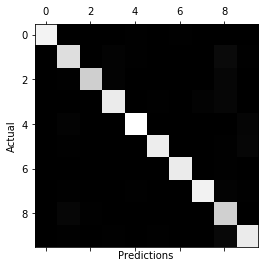

In [111]:
plt.matshow(sgd_matrix, cmap=plt.cm.gray)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [112]:
conf_matrix_info(sgd_X_train_preds, y_train)

Precision: 0.9610448351736868
Recall: 0.9610299234516354
f1: 0.9605547509028174


# Random Forest Classifier

In [114]:
rfc = RandomForestClassifier(random_state=42)

In [115]:
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [125]:
print(f'rfc_scores: {rfc_scores}')
print(f'average: {rfc_scores.mean()}')

rfc_scores: [0.95205479 0.93127148 0.93006993 0.94385965 0.92932862]
average: 0.9373168946569287


In [117]:
rfc_X_train_pred = cross_val_predict(rfc, X_train, y_train, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [118]:
rfc_X_train_pred

array([6, 7, 2, ..., 5, 3, 0])

In [119]:
rfc_matrix = confusion_matrix(rfc_X_train_pred, y_train)

In [120]:
rfc_matrix

array([[145,   0,   1,   1,   0,   2,   0,   0,   1,   0],
       [  0, 137,   2,   1,   1,   2,   1,   1,  10,   1],
       [  0,   0, 122,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 136,   0,   0,   0,   0,   3,   5],
       [  0,   1,   0,   0, 149,   1,   2,   5,   0,   0],
       [  0,   0,   1,   1,   1, 136,   0,   1,   0,   0],
       [  0,   1,   0,   0,   1,   2, 138,   0,   0,   0],
       [  0,   0,   0,   1,   3,   0,   0, 142,   3,   7],
       [  2,   2,   3,   4,   0,   0,   0,   0, 111,   4],
       [  0,   0,   1,   2,   2,   4,   0,   0,   1, 131]])

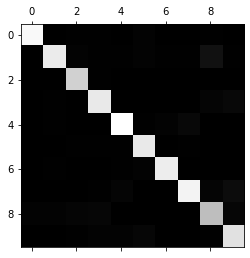

In [121]:
plt.matshow(rfc_matrix, cmap=plt.cm.gray)
plt.show()

In [122]:
conf_matrix_info(rfc_X_train_pred, y_train)

Precision: 0.9383382269871757
Recall: 0.9373695198329853
f1: 0.9373817578468476


In [123]:
rfc_X_train_pred_scores = cross_val_predict(rfc, X_train, y_train, cv=5, method='predict_proba')

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [124]:
rfc_X_train_pred_scores

array([[0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.9, 0.1, 0. ],
       [0.1, 0. , 0.8, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.1, 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 0. , ..., 0. , 0. , 0. ]])

In [62]:
y_scores_forest = rfc_X_train_pred_scores[:, 1]
len(y_scores_forest)

1437